## import important libraries

In [1]:
## import important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load data

In [3]:
# load dataset
data = pd.read_csv('Fitness.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,overweight
1,Male,189,87,fit
2,Female,185,110,overweight
3,Female,195,104,slightly overweight
4,Male,149,61,slightly overweight


## understanding dataset

In [4]:
# check shape (500 rows and 4 columns)
data.shape

(500, 4)

In [5]:
# checking if their is any null value
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [6]:
# statistical information
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [7]:
data.dtypes

Gender    object
Height     int64
Weight     int64
Index     object
dtype: object

## create dummy values for categorical data

In [8]:
# dummed male,female into 0 and 1

gender = pd.get_dummies(data['Gender'], drop_first=True)
gender.columns = ['gender']

In [9]:
gender.head()

,gender
0,1
1,1
2,0
3,0
4,1


In [10]:
# concat gender dataset with original dataset
data = pd.concat([gender,data],axis=1)

In [11]:
data.head()

,gender,Gender,Height,Weight,Index
0,1,Male,174,96,overweight
1,1,Male,189,87,fit
2,0,Female,185,110,overweight
3,0,Female,195,104,slightly overweight
4,1,Male,149,61,slightly overweight


In [12]:
# remove unnecessary column
data.drop('Gender',axis = 1, inplace = True)

In [13]:
data.head()

,gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight


In [14]:
data.Index.value_counts()

extremly overweight    198
overweight             130
fit                     69
slightly overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

## data visualization

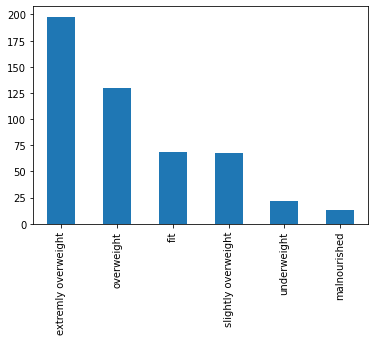

In [15]:
data.Index.value_counts().plot.bar()
plt.show()

In [16]:
data.gender.value_counts()

0    255
1    245
Name: gender, dtype: int64

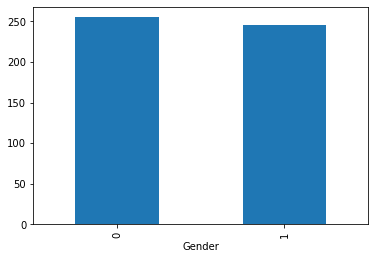

In [17]:
data.gender.value_counts().plot.bar()
plt.xlabel('Gender')
plt.show()

In [18]:
data.corr()

,gender,Height,Weight
gender,1.000000,-0.017677,0.009523
Height,-0.017677,1.000000,0.000446
Weight,0.009523,0.000446,1.000000


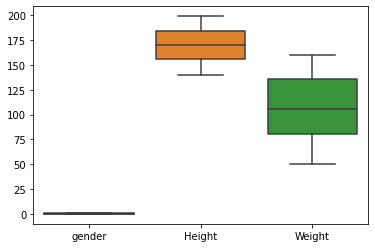

In [19]:
# check if their is any outliers
sns.boxplot(data=data)
plt.show()

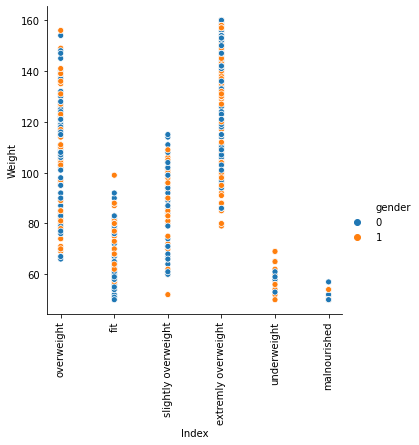

In [20]:
sns.relplot(x='Index',y='Weight',hue='gender',data=data)
plt.xticks(rotation=90)
plt.show()

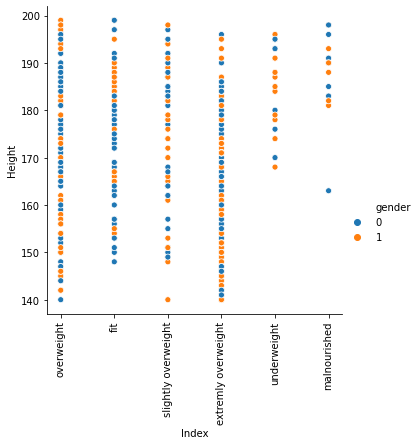

In [21]:
sns.relplot(x='Index',y='Height',hue='gender',data=data)
plt.xticks(rotation=90)
plt.show()

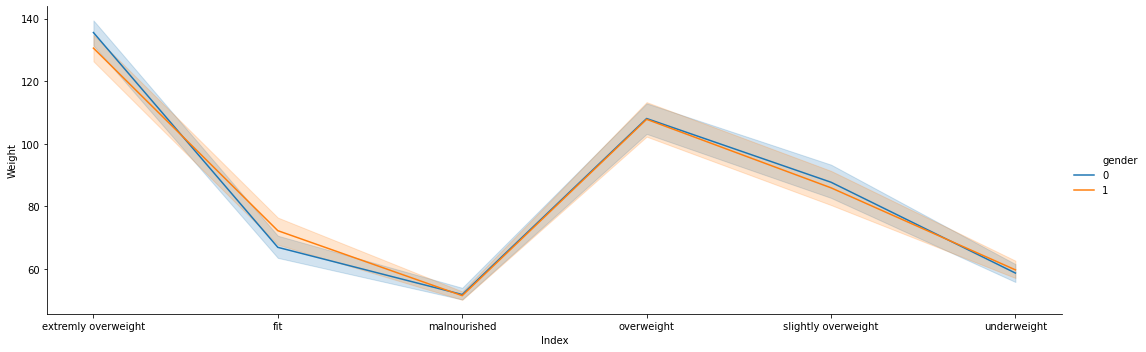

In [22]:

sns.relplot(x="Index",y="Weight",hue="gender",kind='line',data=data, height=5,aspect=3)

## spliting data into training and testing dataset

In [23]:
X = data.drop('Index',axis=1)   # independent variables
y = data['Index']              # dependent varaible

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# split data into traing and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [26]:
# rescale all the numeric data in between 0 to 1

## scale independent data in between 0 to 1

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
# min-max scaler on train and test data set

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## import suppor vectore machine library

In [31]:
# import support vectore machine
from sklearn import svm

In [32]:
clf = svm.SVC()

In [33]:
# fit the model

clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## prediction on test as well and on train dataset

In [34]:
# prediction on test dataset

pred_test = clf.predict(X_test)

In [35]:
# we can also predict on train data set

pred_train = clf.predict(X_train)

In [36]:
# calculate accuracy_score, classification_report,confusion_matrix

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [37]:
# check accuracy for train dataset

accuracy_score(y_train,pred_train)

0.87

In [38]:
# check accuracy for test dataset

accuracy_score(y_test,pred_test)

0.84

In [39]:
# we can say model is neither overfitting nor underfitting
# because accuracy for train and test data set is nearly equal

In [40]:
print(classification_report(y_test,pred_test))

                     precision    recall  f1-score   support

extremly overweight       0.90      0.97      0.93        36
                fit       0.57      0.80      0.67        10
       malnourished       0.00      0.00      0.00         3
         overweight       0.93      0.84      0.89        32
slightly overweight       0.80      0.80      0.80        15
        underweight       0.67      0.50      0.57         4

           accuracy                           0.84       100
          macro avg       0.64      0.65      0.64       100
       weighted avg       0.82      0.84      0.83       100



c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# confusion metrics

confusion_matrix(y_test, pred_test)

array([[35,  0,  0,  1,  0,  0],
       [ 0,  8,  0,  0,  2,  0],
       [ 0,  2,  0,  0,  0,  1],
       [ 4,  0,  0, 27,  1,  0],
       [ 0,  2,  0,  1, 12,  0],
       [ 0,  2,  0,  0,  0,  2]], dtype=int64)

## test the model

In [60]:
# check model is working properly or not 
# here 0-male, 160-height, 50-weight

a = [(0,160,50)]
a = scaler.transform(a)
b = clf.predict(a)
print(b)

['fit']


In [44]:
a = [(0,185,110)]  # if u are female (0) have Height 185 and Weight 110
a = scaler.transform(a)
b = clf.predict(a)
b   # print prediction

array(['overweight'], dtype=object)

In [45]:
data.head()

,gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
